# Problema de asignación 3-dimensional.
### Autor: Saúl Sosa Díaz

En este cuaderno Jupyter, ahondaremos en el [Problema de asignación](https://es.wikipedia.org/wiki/Problema_de_asignaci%C3%B3n), más concretamente, sus variantes 3-dimensionales, tanto la planar como la axial.
Brindando unos supuestos que nos ayudarán a comprender estos problemas.

---
## El Problema.
El problema de asignación es un tipo de problema que se centra en asignar un conjunto de recursos o tareas a un conjunto de destinatarios de manera óptima. 
Existen varias variantes pero nos centraremos en las dos siguientes:
 * __Problema Tridimensional Planar__:

 * __Problema Tridimensional Axial__
  



## Supuesto.
Para abordar ejemplificar este problema vamos a vivir el siguiente supuesto.

Un día, ingresó a nuestras oficinas el Sr. Ayoze Hernández Díaz, quien ocupa la posición de coordinador y directivo en la empresa "Aguas de Tenerife". Su visita estaba motivada por una preocupante situación que enfrentaban en ese momento: La balsa principal de La Orotava se encontraba en un estado prácticamente vacío, lo cual generaba inquietud entre los agricultores locales, quienes, a causa de la escasez de agua, estaban expresando su descontento y exigiendo respuestas.

El Sr. Hernández Díaz nos informó que, en contraposición, la balsa de Santa Cruz de Tenerife disponía de un excedente considerable de agua, y la intención era trasladar la mayor cantidad posible de este recurso hacia la balsa de La Orotava. Sin embargo, se presentaba un desafío crucial: las tuberías que conectaban estas balsas tenían una capacidad máxima de transporte. Superar esta capacidad implicaría el riesgo de dañar las tuberías, lo que debía evitarse a toda costa.

Además, el Sr. Hernández Díaz nos explicó que, para llegar a la balsa de La Orotava desde Santa Cruz de Tenerife, era necesario atravesar una serie de balsas intermedias. Nos proporcionó un mapa detallado en el que se mostraban claramente estas balsas intermedias y las conexiones de tuberías entre ellas, además del coste por litro que supondría mandar agua por ellas. Esta información era esencial para comprender la complejidad de la situación y evaluar las posibles soluciones.

### Datos.
Tenemos un conjunto de nodos que corresponden a balsas, al conjunto lo llamaremos $V = \{1,\ldots,n\}$.

En este contexto, nuestro punto de origen, o nodo fuente, se identifica como la balsa de Santa Cruz, que corresponde al nodo 5 en nuestra representación. Por otro lado, el destino final, o nodo sumidero, se encuentra en la balsa de La Orotava, correspondiente al nodo 2 en nuestra estructura.

Cómo tenemos la información del mapa podemos crear una matriz $C_{ij}$. Donde cada posición indique la capacidad máxima de la tubería que conecta la balsa $_i$ con la balsa $_j$. $\forall i,j ∈ V$ .

Además, podemos crear una matriz $Cost_{ij}$. Donde cada posición indique el coste unitario de la tubería que conecta la balsa $_i$ con la balsa $_j$. $\forall i,j ∈ V$ .

Si $C_{ts}$ no existe, creamos una tubería y le asignaremos una capacidad infinita. 
Además, debemos asignar el siguiente coste a la tubería que acabmos de crear, $Cost_{ts} =  Cost_{ts} - M$ Siendo  un número muy grande $M \in \mathbb{R}$.


### Modelo.
#### Variables.

* $X_{ij}$ = Cuanto irá por la tubería que conecta la balsa $_i$ a la balsa $_j$.
#### Función Objetivo.
$$
\begin{array}{ccc}
min \sum_{i∈V}\sum_{j∈V}  Cost_{ij} * X_{ij}& \\&  
\end{array}
$$
#### Restricciones.
$$
\begin{array}{ccc}
&  \sum_{j∈V} X_{ij} - \sum_{j∈V} X_{ji} = 0 & i \in V \\\\
&  0\leq X_{ij} \leq C_{ij} & \forall i,j ∈ V \\
\end{array}
$$

La restricción tiene como objetivo expresar la idea fundamental de que la cantidad que sale de un nodo debe ser igual a la cantidad que llega a otro nodo. Por esta razón, los índices están modificados, excepto para los nodos _s_ y _t_.

## Problema Tridimensional Axial
### Supuesto.
Un día, el dueño del supermercado _El Sauzal Comercia_ visitó nuestra oficina con un problema: sus clientes estaban dejando de visitar su supermercado. Después de realizar varias encuestas a sus antiguos clientes, llegó a la conclusión de que los productos estaban mal ubicados en las estanterías de la tienda. Por lo tanto, les preguntó a sus clientes dónde preferirían que estuviera cada artículo, es decir, en qué estantería y nivel de la estantería del supermercado.

Con esa información, realizó y brindo un mapa del supermercado con toda la información de las estanterías del establecimiento.
* Número de niveles de las estanterías todas las estanterías tienen el mismo número de niveles.
* Capacidad de los niveles de cada estantería.
* Satisfacción de los clientes al encontrar cada artículo en niveles de estanterías específicas.

Por tanto lo que tenemos es:
* Conjunto de estanterías que llamaremos $E = \{1,\ldots,n\}$.
* Conjunto de niveles que llamaremos $N = \{1,\ldots,m\}$.
* Conjunto de artículos que llamaremos $K = \{1,\ldots,h\}$.
* Capacidad de cada nivel de cada estantería. la cual llamaremos $C_{ij}$. Donde cada posición indicará la capacidad máxima del nivel $j$ de la estantería $i$. $\forall i ∈ E \land \forall j ∈ N$
* Satisfaccion de todos los artículos en todos los niveles de todas las estanterías, que denotaremos como $S_{ijk}$. Donde cada posición indicará la media de satifacción de los clientes de encontrar el artículo $k$ en el nivel $j$ de la estantería $i$. $\forall i ∈ E \land \forall j ∈ N \land \forall k ∈ K$

### Modelo
#### Variables.
* $X_{ijk} = \begin{dcases}
   1 &\text{Si el artículo } k \text{ se coloca en el nivel } j \text{ de la estantería } i. \text{ }\forall i ∈ E \land \forall j ∈ N \land \forall k ∈ K\\
   0 &\text{Otro caso}
\end{dcases}$
#### Función Objetivo.
$$
\begin{array}{ccc}
max \sum_{i∈E}\sum_{j∈N}\sum_{k∈K} S_{ijk} * X_{ijk}& \\&  
\end{array}
$$
#### Restricciones.
$$
\begin{array}{ccc}
&  \sum_{i∈E}\sum_{j∈N} X_{ijk} = 1 & \forall k \in K \\&
\sum_{i∈E} X_{ijk} = 1 & \forall j ∈ N \land \forall k ∈ K \\
&  0\leq X_{ij} \leq C_{ij} & \forall i,j ∈ V \\
\end{array}
$$


## Resolución del problema.
Importamos los paquetes necesarios.

In [1]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")


using JuMP, GLPK, Random


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


### Introducimos los datos.

In [14]:
E = 3         # número de estanterías
N = 5         # número de niveles
K = 15    # numero de artículos
Random.seed!(1234)
S = rand(2:20, E, N, K)
C = rand(1:2, E, N) # capacidad de cada estantería y nivel


3×5 Matrix{Int64}:
 2  2  2  2  2
 1  2  1  1  1
 1  1  2  1  1

In [16]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:E,1:N,1:K] >= 0, binary=true)

# Definir función objetivo
@objective(model, Max, sum(S[i,j,k] * x[i,j,k] for i in 1:E, j in 1:N, k in 1:K))

@constraint(model, p[k=1:K] , sum(x[:,:,k]) == 1 ) # Cada producto está asociado a una estantería y nivel.
@constraint(model, c[i=1:E,j=1:N] , sum(x[i,j,:]) >= 1 ) # Cada nivel de cada estantería tiene al menos un producto.
@constraint(model, h[i=1:E,j=1:N] , sum(x[i,j,:]) <= C[i,j] ) # Cada estantería y nivel tiene como mucho de su capacidad total.



3×5 Matrix{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}}:
 h[1,1] : x[1,1,1] + x[1,1,2] + x[1,1,3] + x[1,1,4] + x[1,1,5] + x[1,1,6] + x[1,1,7] + x[1,1,8] + x[1,1,9] + x[1,1,10] + x[1,1,11] + x[1,1,12] + x[1,1,13] + x[1,1,14] + x[1,1,15] ≤ 2  …  h[1,5] : x[1,5,1] + x[1,5,2] + x[1,5,3] + x[1,5,4] + x[1,5,5] + x[1,5,6] + x[1,5,7] + x[1,5,8] + x[1,5,9] + x[1,5,10] + x[1,5,11] + x[1,5,12] + x[1,5,13] + x[1,5,14] + x[1,5,15] ≤ 2
 h[2,1] : x[2,1,1] + x[2,1,2] + x[2,1,3] + x[2,1,4] + x[2,1,5] + x[2,1,6] + x[2,1,7] + x[2,1,8] + x[2,1,9] + x[2,1,10] + x[2,1,11] + x[2,1,12] + x[2,1,13] + x[2,1,14] + x[2,1,15] ≤ 1     h[2,5] : x[2,5,1] + x[2,5,2] + x[2,5,3] + x[2,5,4] + x[2,5,5] + x[2,5,6] + x[2,5,7] + x[2,5,8] + x[2,5,9] + x[2,5,10] + x[2,5,11] + x[2,5,12] + x[2,5,13] + x[2,5,14] + x[2,5,15] ≤ 1
 h[3,1] : x[3,1,1] + x[3,1,2] + x[3,1,3] + x[3,1,4] + x[3,1,5] + x[3,1,6] + x[3,1,7] + x[3,1,8] +

In [17]:
optimize!(model)

In [19]:
objetive = objective_value(model)
println("Beneficio: ", objetive, " €")

println("Estanterías:")
println()
for i in 1:E  
    println("  Estantería $i")
    for j in 1:N
        Ci_j = C[i,j]
        println("    Nivel $j con capacidad para $Ci_j artículos. Contiene los artículos:")
        uno = false
        for k in 1:K
            if value(x[i,j,k]) > 0
                uno = true
                println("      * artículo $k")
            end
        end
    end
    println()
end

Beneficio: 281.0 €
Estanterías:

  Estantería 1
    Nivel 1 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 10
    Nivel 2 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 3
    Nivel 3 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 11
    Nivel 4 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 7
    Nivel 5 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 5

  Estantería 2
    Nivel 1 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 2
    Nivel 2 con capacidad para 2 artículos. Contiene los artículos:
      * artículo 14
    Nivel 3 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 1
    Nivel 4 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 8
    Nivel 5 con capacidad para 1 artículos. Contiene los artículos:
      * artículo 12

  Estantería 3
    Nivel 1 con capacidad para 1 artículos. Co

### Construir el modelo.
Si las capacidades $Cmax$ y los costes $Costs$ son números enteros, las variables resultantes resultarán también números enteros, la matriz es unimodular. Como explica González Salazar, J.J. (2001, p. 217). Programación Matemática.

In [ ]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0)

# Definir función objetivo
@objective(model, Min, sum(Costs[i,j] * x[i,j] for i in 1:n, j in 1:n ))

# Definir restricciones
for i in 1:n
        for j in 1:n
                if Cmax[i, j] > 0
                        @constraint(model, x[i, j] <= Cmax[i, j])
                else
                        @constraint(model, x[i, j] == 0)
                end
        end
end


@constraint(model, c[i = 1:n],  sum(x[i, :])  - sum(x[:, i]) == 0)

LoadError: UndefVarError: `Costs` not defined

Mostramos el modelo.

In [ ]:
print(model)

### Resolvemos el modelo.

In [ ]:
optimize!(model)

Mostramos el resultado

In [ ]:
objetive = objective_value(model) + value(x[t, s]) * M
println("Coste mínimo: ", objetive, " €")

println("Flujo máximo: ", value(x[t, s]), " l")

println("Flujos en las tuberías:")
for i in 1:n  
    for j in 1:n
        if value(x[i, j]) > 0 && i != t && j != s
            println("  Balsa $i")
            println("    Flujo en la tubería $i->$j: ", value(x[i, j]), "l, coste ", Costs[i, j] * value(x[i, j]), "€.")
        end
    end
end

Coste mínimo: 3528.0 €
Flujo máximo: 147.0 l
Flujos en las tuberías:
  Balsa 3
    Flujo en la tubería 3->2: 94.0l, coste 658.0€.
  Balsa 4
    Flujo en la tubería 4->3: 28.0l, coste 280.0€.
  Balsa 5
    Flujo en la tubería 5->4: 28.0l, coste 168.0€.
  Balsa 5
    Flujo en la tubería 5->6: 119.0l, coste 833.0€.
  Balsa 6
    Flujo en la tubería 6->3: 66.0l, coste 264.0€.
  Balsa 6
    Flujo en la tubería 6->7: 53.0l, coste 689.0€.
  Balsa 7
    Flujo en la tubería 7->8: 53.0l, coste 371.0€.
  Balsa 8
    Flujo en la tubería 8->2: 53.0l, coste 265.0€.


## Comprobar que el flujo máximo es el de coste minimo.
Para ello utilizaremos un grafo con varios flujos máximos, y consecuentemente diferentes coste. 


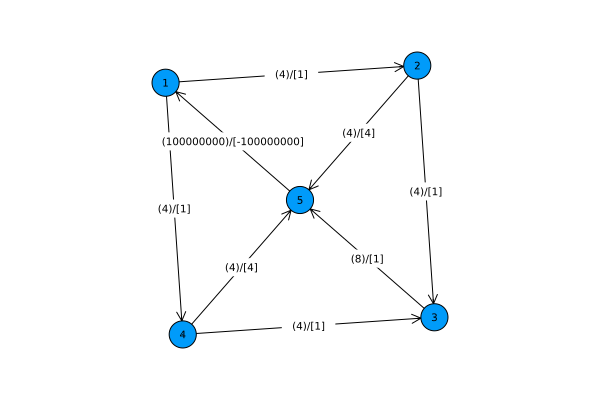

In [ ]:
M = 100000000
Cmax = 
    [0 4 0 4 0;
     0 0 4 0 4;
     0 0 0 0 8;
     0 0 4 0 4;
     M 0 0 0 0;
     ]
Costs =    
[0 1 0 1 0;
0 0 1 0 4;
0 0 0 0 1;
0 0 1 0 4;
-M 0 0 0 0;
]
s = 1
t = 5
n=size(Cmax,1)

graph(Cmax, Costs)

En este grafo hay varios diferentes flujos máximos:
* 1 -> 4 (4), 1 -> 2 (4), 2 -> 5 (4), 4 -> 5 (4).  El flujo máximo es 8 y el coste total sería 40.
* 1 -> 4 (4), 1 -> 2 (4), 2 -> 3 (4), 4 -> 3 (4), 3 -> 5 (8).  Este flujo también es máximo. Sin embargo, el coste total sería 24.


In [ ]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0)

# Definir función objetivo
@objective(model, Min, sum(Costs[i,j] * x[i,j] for i in 1:n, j in 1:n ))

# Definir restricciones
for i in 1:n
        for j in 1:n
                if Cmax[i, j] > 0
                        @constraint(model, x[i, j] <= Cmax[i, j])
                else
                        @constraint(model, x[i, j] == 0)
                end
        end
end
@constraint(model, c[i = 1:n],  sum(x[i, :])  - sum(x[:, i]) == 0)

optimize!(model)

Comprobamos que el flujo máximo que se consigue es el de coste mínimo, en este caso el de coste total 24.

In [ ]:
objetive = objective_value(model) + value(x[t, s]) * M
println("Coste mínimo: ", objetive)

println("Flujo máximo: ", value(x[t, s]))

println("Flujos en los arcos:")
for i in 1:n
    for j in 1:n
        if value(x[i, j]) > 0 && i != t && j != s
            println("  Nodo $i")
            println("    Flujo de $i->$j: ", value(x[i, j]), " coste ", Costs[i, j] * value(x[i, j]))
        end
    end
end

Coste mínimo: 24.0
Flujo máximo: 8.0
Flujos en los arcos:
  Nodo 1
    Flujo de 1->2: 4.0 coste 4.0
  Nodo 1
    Flujo de 1->4: 4.0 coste 4.0
  Nodo 2
    Flujo de 2->3: 4.0 coste 4.0
  Nodo 3
    Flujo de 3->5: 8.0 coste 8.0
  Nodo 4
    Flujo de 4->3: 4.0 coste 4.0


Podemos comprobar con este pequeño ejemplo que el problema está correctamente modelizado.

## Bibliografía:
* Salazar González,J.J. (2001). Programación matemática.